In [ ]:
!pip install keras_core keras_nlp

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 41.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.1/644.1 kB 41.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 62.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 59.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 84.5 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.0
    Uninstalling tensorboard-2.17.0:
      Successfully uninstalled tensorboard-2.17.0
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.17.0
    Uninstalling tensorflow-2.17.0:
      Successfully uninstalled tensorflow-2.17.0
ERROR: pip's dependency resolver 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import string
import csv
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf
import keras_core as keras
import keras_nlp
from tensorflow import keras

Using TensorFlow backend


In [ ]:
def train_dev_jsonl_to_csv(jsonl_file, csv_file):
    csv_columns = ['id', 'essay', 'label']

    with open(csv_file, 'w', newline='', encoding='utf-8') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=csv_columns)
        writer.writeheader()

        with open(jsonl_file, 'r', encoding='utf-8') as f:
            for line in f:
                data = json.loads(line)
                filtered_data = {key: data[key] for key in csv_columns}
                writer.writerow(filtered_data)


def test_jsonl_to_csv(jsonl_file, csv_file):
    csv_columns = ['id', 'essay']

    with open(csv_file, 'w', newline='', encoding='utf-8') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=csv_columns)
        writer.writeheader()

        with open(jsonl_file, 'r', encoding='utf-8') as f:
            for line in f:
                data = json.loads(line)
                writer.writerow(data)

In [ ]:
en_train_jsonl_file = 'academic_essay_english_train.jsonl'
en_train_csv_file = 'english_train.csv'
train_dev_jsonl_to_csv(en_train_jsonl_file, en_train_csv_file)
print(f"Data successfully written to {en_train_csv_file}")

In [ ]:
en_dev_jsonl_file = 'academic_essay_english_dev.jsonl'
en_dev_csv_file = 'english_dev.csv'
train_dev_jsonl_to_csv(en_dev_jsonl_file, en_dev_csv_file)
print(f"Data successfully written to {en_dev_csv_file}")

In [ ]:
en_test_jsonl_file = 'academic_essay_english_dev_test_no_label.jsonl'
en_test_csv_file = 'english_devtest.csv'
test_jsonl_to_csv(en_test_jsonl_file, en_test_csv_file)
print(f"Data successfully written to {en_test_csv_file}")

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Coling2025/english_train.csv')
train

,id,essay,label
0,cc7727e8bfbc6e0051b71ceeeb928755def0f5e94b5168...,I disagree with the statement that the develop...,ai
1,fa7e1bc99ea20c78df905eb3780cb835bed078b64fce6a...,I disagree with the statement that the primary...,ai
2,d16ec17f6ffd059cf2eefe79ca2ccd9bdb78ea5ec2d6a0...,International sports events require the most w...,human
3,838f538cf1b0e03e51e423266844492af1a72874a224d4...,While some individuals may argue that working ...,ai
4,cd9fe478b001e04bcdc276f9675b90bc8c6332a7ea8abf...,I disagree with the statement that working rem...,ai
...,...,...,...
2091,1cf89b43ddf6f54c41ce5ff8d584dd47fbe21fc9007048...,Capital punishment is always associated with i...,human
2092,90aeae7d7df06d9e45cff4494973ad4cc668aa92f395b7...,Sport play an essential role in shaping the pe...,human
2093,a6ac8461fe6b71161372b63438d531af3168e3f4c5ce1c...,It is true that artificial activities cause te...,human
2094,a0bf652b04c7f6fdfea48ccabcc853aa21c832ce749257...,Packing of goods has become a noticeable issue...,human


In [ ]:
dev = pd.read_csv('/content/drive/MyDrive/Coling2025/english_dev.csv')
dev

,id,essay,label
0,f2c01bb1c6a76d96032879f999c94b0a6f85c7dc811789...,When faced to the questions that successful pe...,human
1,daece00c9d1a2fac77d9691df68b3c4537ac1e08569ddf...,"To start with , nowadays theres alot for peopl...",human
2,e3518500503fecb0e4993323f5b265d0ab386bd95ea2d5...,Successful people try new things because...,human
3,5796a76d2e4dcf027f3dbab6ca0fbd99c92b1a8be00645...,The path to success is rarely paved with famil...,ai
4,5d7d0983750bd528407aba6e2fa8731d66b6a58bf9d920...,The pursuit of success often involves venturin...,ai
...,...,...,...
1621,2184a4025f920c763b0a85b86aa28e0a2ea495edde9063...,I assume that people who are willing to try ne...,human
1622,d7ee816fd4f1d6c8b78f859f7d514de840fdd969d65470...,"To success in this life, we have to do all wh...",human
1623,09d8090cd31ac54cb83b5b1f6eff9237ebdb12ce76029e...,I'm not sure about the real meaning of the wor...,human
1624,0b0ebaa2b7d350654024fd53b6c2ba2bc345e384f4e989...,Eessential way to succeed is trying new things...,human


In [ ]:
test = pd.read_csv('/content/drive/MyDrive/Coling2025/english_devtest.csv')
test

,id,essay
0,abab7ec20320a84b1c1f097a39c895352e4341d6b00c3e...,"Enjoyment means entertainment, satisfaction of..."
1,15a035178efbb0f45d3d6e3421528e23721a802e6c4730...,Before to start with my opinion of the topic i...
2,ede4767f9bc94020ee2ed56ee0d03404c76c2877ce0218...,"Thats a really really good subject, but acctul..."
3,2c996b6d0beb561b9d0ea2b4426b3cf78cd88b544e0934...,I disagree with the statement saying that it i...
4,3cce0e704c3d2023155e3634f130c616bd49ff3b75eb8c...,It is undeniable that advertisements play a si...
...,...,...
864,a4faf8f47e79c51f71cafea21e8137fdeed7418a71229c...,Advertisements occupy a big part in our lives ...
865,318b7d74d32c4613b1ffc9b41b4a4b5fb321b815c27b05...,Young people are the fundamental building bloc...
866,6ca284a081ce0b739b68b3edca543780d88ee056425f3a...,"In my opinion, and experience, old people can ..."
867,980647f5bf2b94a4f67b6c36665b165440bbea259520d1...,I agree with this statement that most advertis...


In [ ]:
train['label'] = train['label'].apply(lambda s: 0 if s == 'human' else 1)

In [ ]:
dev['label'] = dev['label'].apply(lambda s: 0 if s == 'human' else 1)

In [ ]:
train = train.drop(columns=['id'])

In [ ]:
dev = dev.drop(columns=['id'])

In [ ]:
train

,essay,label
0,I disagree with the statement that the develop...,1
1,I disagree with the statement that the primary...,1
2,International sports events require the most w...,0
3,While some individuals may argue that working ...,1
4,I disagree with the statement that working rem...,1
...,...,...
2091,Capital punishment is always associated with i...,0
2092,Sport play an essential role in shaping the pe...,0
2093,It is true that artificial activities cause te...,0
2094,Packing of goods has become a noticeable issue...,0


In [ ]:
dev

,essay,label
0,When faced to the questions that successful pe...,0
1,"To start with , nowadays theres alot for peopl...",0
2,Successful people try new things because...,0
3,The path to success is rarely paved with famil...,1
4,The pursuit of success often involves venturin...,1
...,...,...
1621,I assume that people who are willing to try ne...,0
1622,"To success in this life, we have to do all wh...",0
1623,I'm not sure about the real meaning of the wor...,0
1624,Eessential way to succeed is trying new things...,0


In [ ]:
train['text_length'] = train['essay'].apply(lambda x : len(x.split()))

Text(0.5, 0.98, 'Distribution of the length per essay - Train dataset')

<Figure size 4000x5000 with 0 Axes>

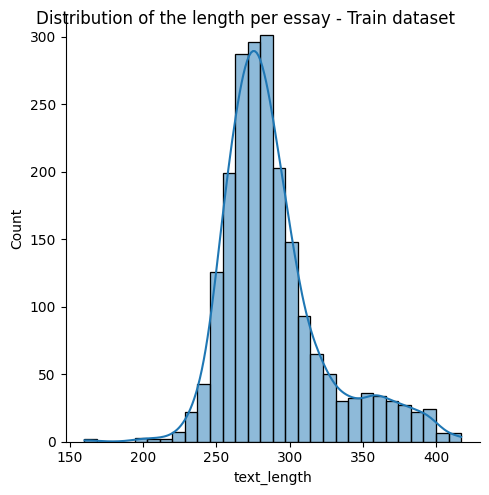

In [ ]:
fig = plt.figure(figsize=(40,50))
plot = sns.displot(data=train, x="text_length", bins=30, kde=True)
plot.fig.suptitle("Distribution of the length per essay - Train dataset")

In [ ]:
train["text_length"].mean(), train["text_length"].std()

(288.92891221374043, 35.21293161192877)

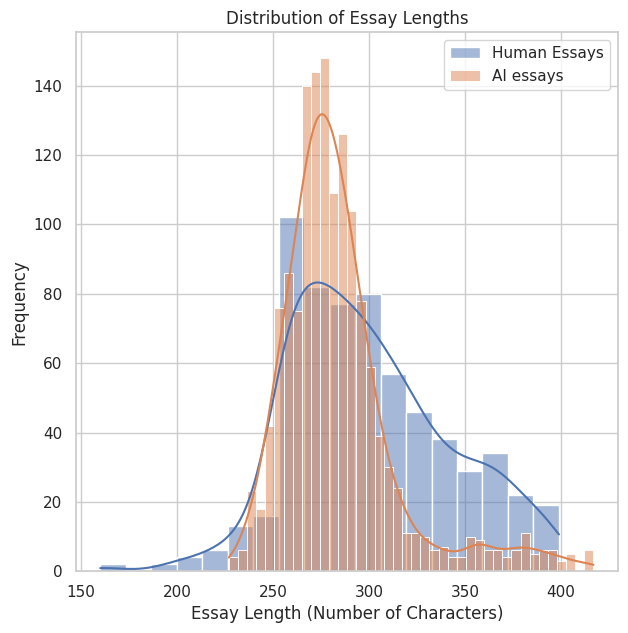

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(7, 7))

sns.histplot(data=train[train["label"] == 0]["text_length"], label = "Human Essays", kde = True)
sns.histplot(data=train[train["label"] == 1]["text_length"], label = "AI essays", kde = True)

plt.title('Distribution of Essay Lengths')
plt.xlabel('Essay Length (Number of Characters)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

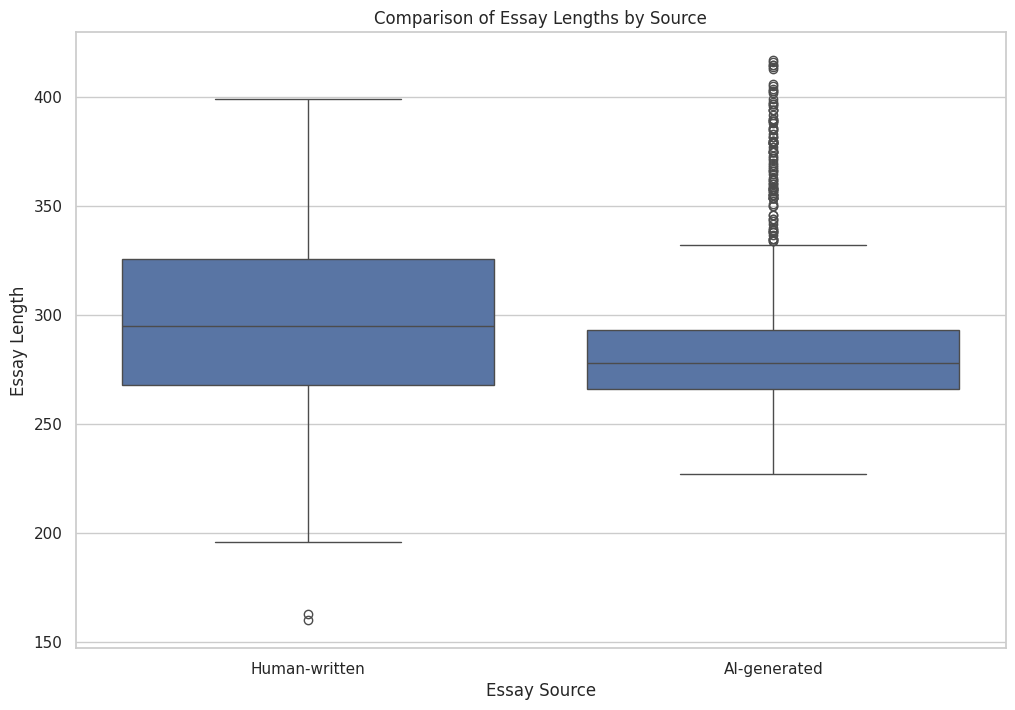

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='label', y='text_length', data=train)
plt.title('Comparison of Essay Lengths by Source')
plt.xlabel('Essay Source')
plt.ylabel('Essay Length')
plt.xticks([0, 1], ['Human-written', 'AI-generated'])
plt.show()

In [ ]:
def create_text_metrics(text):
    word_count = len(text.split())
    sentence_count = len(text.split('.'))
    unique_word_count = len(set(text.split()))
    return word_count, sentence_count, unique_word_count

train['metrics'] = train['essay'].apply( create_text_metrics)
train[['word_count', 'sentence_count', 'unique_word_count']] = pd.DataFrame(train['metrics'].tolist(), index = train.index)
train.drop('metrics', axis=1, inplace=True)

comparison_metrics = train.groupby('label')[['word_count',  'sentence_count', 'unique_word_count']].mean()
comparison_metrics

,word_count,sentence_count,unique_word_count
label,,,
0,300.249603,15.577107,173.484897
1,284.074983,14.518064,155.248807


In [ ]:
train

,essay,label,text_length,word_count,sentence_count,unique_word_count
0,I disagree with the statement that the develop...,1,301,301,13,155
1,I disagree with the statement that the primary...,1,287,287,16,154
2,International sports events require the most w...,0,269,269,11,143
3,While some individuals may argue that working ...,1,272,272,14,144
4,I disagree with the statement that working rem...,1,252,252,12,132
...,...,...,...,...,...,...
2091,Capital punishment is always associated with i...,0,285,285,20,180
2092,Sport play an essential role in shaping the pe...,0,282,282,13,163
2093,It is true that artificial activities cause te...,0,254,254,18,137
2094,Packing of goods has become a noticeable issue...,0,324,324,15,181


In [ ]:
dev['text_length'] = dev['essay'].apply(lambda x : len(x.split()))

Text(0.5, 0.98, 'Distribution of the length per essay - Dev dataset')

<Figure size 4000x5000 with 0 Axes>

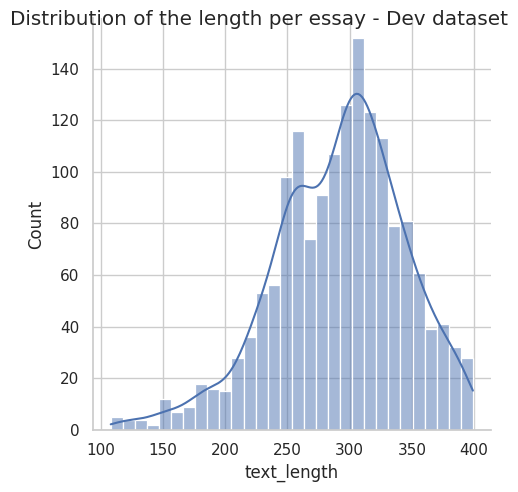

In [ ]:
fig = plt.figure(figsize=(40,50))
plot = sns.displot(data=dev, x="text_length", bins=30, kde=True)
plot.fig.suptitle("Distribution of the length per essay - Dev dataset")

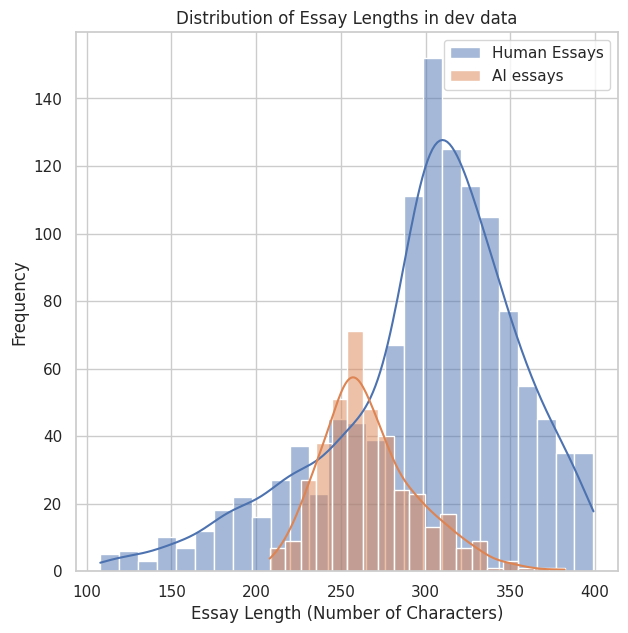

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(7, 7))

sns.histplot(data=dev[dev["label"] == 0]["text_length"], label = "Human Essays", kde = True)
sns.histplot(data=dev[dev["label"] == 1]["text_length"], label = "AI essays", kde = True)

plt.title('Distribution of Essay Lengths in dev data')
plt.xlabel('Essay Length (Number of Characters)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

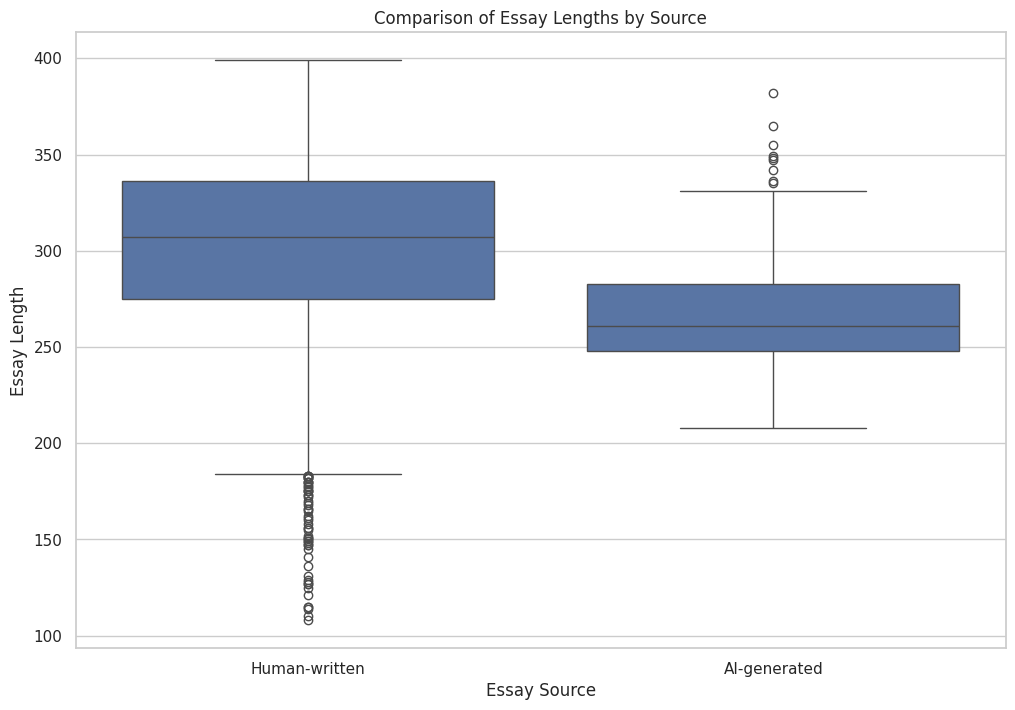

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='label', y='text_length', data=dev)
plt.title('Comparison of Essay Lengths by Source')
plt.xlabel('Essay Source')
plt.ylabel('Essay Length')
plt.xticks([0, 1], ['Human-written', 'AI-generated'])
plt.show()

In [ ]:
def create_text_metrics(text):
    word_count = len(text.split())
    sentence_count = len(text.split('.'))
    unique_word_count = len(set(text.split()))
    return word_count, sentence_count, unique_word_count

dev['metrics'] = dev['essay'].apply( create_text_metrics)
dev[['word_count', 'sentence_count', 'unique_word_count']] = pd.DataFrame(dev['metrics'].tolist(), index = dev.index)
dev.drop('metrics', axis=1, inplace=True)

comparison_metrics = dev.groupby('label')[['word_count',  'sentence_count', 'unique_word_count']].mean()
comparison_metrics

,word_count,sentence_count,unique_word_count
label,,,
0,299.395142,16.685020,162.479352
1,267.035806,15.035806,165.260870


In [ ]:
dev

,essay,label,text_length,word_count,sentence_count,unique_word_count
0,When faced to the questions that successful pe...,0,348,348,13,174
1,"To start with , nowadays theres alot for peopl...",0,368,368,4,162
2,Successful people try new things because...,0,296,296,19,147
3,The path to success is rarely paved with famil...,1,289,289,17,182
4,The pursuit of success often involves venturin...,1,291,291,18,184
...,...,...,...,...,...,...
1621,I assume that people who are willing to try ne...,0,347,347,15,174
1622,"To success in this life, we have to do all wh...",0,220,220,10,131
1623,I'm not sure about the real meaning of the wor...,0,263,263,13,144
1624,Eessential way to succeed is trying new things...,0,223,223,19,143


In [ ]:
SEQ_LENGTH = 512

# Use a shorter sequence length.
preprocessor = keras_nlp.models.DistilBertPreprocessor.from_preset(
    "distil_bert_base_en_uncased",
    sequence_length=SEQ_LENGTH,
)

# Pretrained classifier.
classifier = keras_nlp.models.DistilBertClassifier.from_preset(
    "distil_bert_base_en_uncased",
    num_classes=2,
    activation=None,
    preprocessor=preprocessor,
)

# Re-compile (e.g., with a new learning rate)
classifier.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.Adam(5e-4),
    metrics=[
        keras.metrics.SparseCategoricalAccuracy()
   ]
)


# Access backbone programmatically (e.g., to change `trainable`).
classifier.backbone.trainable = False

classifier.summary()

100%|██████████| 515/515 [00:00<00:00, 1.08MB/s]


100%|██████████| 580/580 [00:00<00:00, 495kB/s]


100%|██████████| 226k/226k [00:00<00:00, 286kB/s]


100%|██████████| 253M/253M [00:19<00:00, 13.6MB/s]


Preprocessor: "distil_bert_text_classifier_preprocessor"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                                                  ┃                                   Config ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ distil_bert_tokenizer (DistilBertTokenizer)                   │                       Vocab size: 30,522 │
└───────────────────────────────────────────────────────────────┴──────────────────────────────────────────┘

Model: "distil_bert_text_classifier"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ padding_mask (InputLayer)     │ (None, None)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ token_ids (InputLayer)        │ (None, None)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ distil_bert_backbone          │ (None, None, 768)         │      66,362,880 │ padding_mask[0][0],        │
│ (DistilBertBackbone)          │                           │                 │ token_ids[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ get_item (GetItem)            │ (None, 768)               │               0 │ distil_bert_backbone[0][0] │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pooled_dense (Dense)          │ (None, 768)               │         590,592 │ get_item[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ output_dropout (Dropout)      │ (None, 768)               │               0 │ pooled_dense[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ logits (Dense)                │ (None, 2)                 │           1,538 │ output_dropout[0][0]       │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 66,955,010 (255.41 MB)

 Trainable params: 592,130 (2.26 MB)

 Non-trainable params: 66,362,880 (253.15 MB)

In [ ]:
# SEQ_LENGTH = 512

# # Use a shorter sequence length.
# preprocessor = keras_nlp.models.RobertaPreprocessor.from_preset(
#     "roberta_base_en",
#     sequence_length=SEQ_LENGTH,
# )

# # Pretrained classifier.
# classifier = keras_nlp.models.RobertaClassifier.from_preset(
#     "roberta_base_en",
#     num_classes=2,
#     activation=None,
#     preprocessor=preprocessor,
# )

# # Re-compile (e.g., with a new learning rate)
# classifier.compile(
#     loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#     optimizer=keras.optimizers.Adam(5e-4),
#     metrics=[
#         keras.metrics.SparseCategoricalAccuracy()
#    ]
# )


# # Access backbone programmatically (e.g., to change `trainable`).
# classifier.backbone.trainable = False

# classifier.summary()

100%|██████████| 498/498 [00:00<00:00, 1.14MB/s]


100%|██████████| 463/463 [00:00<00:00, 518kB/s]


100%|██████████| 0.99M/0.99M [00:01<00:00, 740kB/s]


100%|██████████| 446k/446k [00:01<00:00, 440kB/s]


100%|██████████| 474M/474M [00:31<00:00, 15.7MB/s]


Preprocessor: "roberta_text_classifier_preprocessor"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                                                  ┃                                   Config ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ roberta_tokenizer (RobertaTokenizer)                          │                       Vocab size: 50,265 │
└───────────────────────────────────────────────────────────────┴──────────────────────────────────────────┘

Model: "roberta_text_classifier"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ padding_mask (InputLayer)     │ (None, None)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ token_ids (InputLayer)        │ (None, None)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ roberta_backbone              │ (None, None, 768)         │     124,052,736 │ padding_mask[0][0],        │
│ (RobertaBackbone)             │                           │                 │ token_ids[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ get_item (GetItem)            │ (None, 768)               │               0 │ roberta_backbone[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pooled_dropout (Dropout)      │ (None, 768)               │               0 │ get_item[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pooled_dense (Dense)          │ (None, 768)               │         590,592 │ pooled_dropout[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ output_dropout (Dropout)      │ (None, 768)               │               0 │ pooled_dense[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ logits (Dense)                │ (None, 2)                 │           1,538 │ output_dropout[0][0]       │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 124,644,866 (475.48 MB)

 Trainable params: 592,130 (2.26 MB)

 Non-trainable params: 124,052,736 (473.22 MB)

In [ ]:
X_train = train["essay"]
X_test = dev["essay"]
y_train = train["label"]
y_test = dev["label"]

In [ ]:
# Fit
classifier.fit(x=X_train,
               y=y_train,
               validation_data=(X_test, y_test),
               epochs=1,
               batch_size=64
              )

33/33 ━━━━━━━━━━━━━━━━━━━━ 115s 3s/step - loss: 0.4496 - sparse_categorical_accuracy: 0.7597 - val_loss: 0.0579 - val_sparse_categorical_accuracy: 0.9895


In [ ]:
def displayConfusionMatrix(y_true, y_pred, dataset):
    disp = ConfusionMatrixDisplay.from_predictions(
        y_true,
        np.argmax(y_pred, axis=1),
        display_labels=["Human","AI"],
        cmap=plt.cm.Blues
    )

    tn, fp, fn, tp = confusion_matrix(y_true, np.argmax(y_pred, axis=1)).ravel()
    f1_score = tp / (tp+((fn+fp)/2))

    disp.ax_.set_title("Confusion Matrix on " + dataset + " Dataset -- F1 Score: " + str(f1_score.round(2)))

In [ ]:
classifier.save("models_robert.keras")

In [ ]:
y_pred_test = classifier.predict(X_test)

51/51 ━━━━━━━━━━━━━━━━━━━━ 33s 553ms/step


In [ ]:
y_pred_test

array([[ 2.5336328, -2.5406995],
       [ 3.105048 , -3.0629683],
       [ 2.6542497, -2.6227942],
       ...,
       [ 1.9511896, -1.9806947],
       [ 2.7030606, -2.6466203],
       [-3.0378194,  2.8186264]], dtype=float32)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef

def alldisplayConfusionMatrix(y_true, y_pred, dataset):
    disp = ConfusionMatrixDisplay.from_predictions(
        y_true,
        np.argmax(y_pred, axis=1),
        display_labels=["Human", "AI"],
        cmap=plt.cm.Blues
    )

    tn, fp, fn, tp = confusion_matrix(y_true, np.argmax(y_pred, axis=1)).ravel()

    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp) if tp + fp > 0 else 0
    recall = tp / (tp + fn) if tp + fn > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if precision + recall > 0 else 0
    mcc = matthews_corrcoef(y_true, np.argmax(y_pred, axis=1))

    disp.ax_.set_title("Confusion Matrix on " + dataset + " Dataset -- F1 Score: " + str(round(f1, 2)))

    plt.show()

    # Print metrics
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Matthews Correlation Coefficient (MCC): {mcc:.4f}")


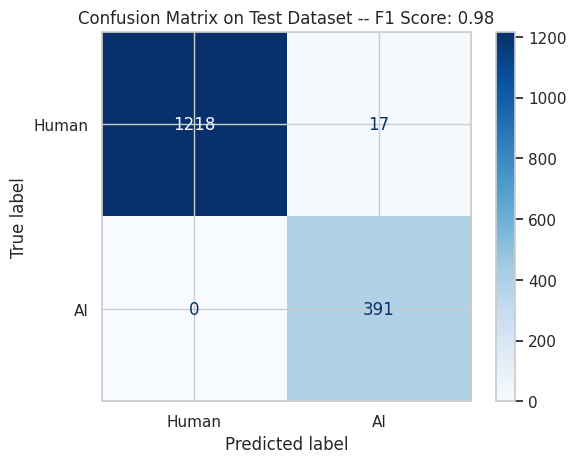

Accuracy: 0.9895
Precision: 0.9583
Recall: 1.0000
F1 Score: 0.9787
Matthews Correlation Coefficient (MCC): 0.9722


In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
alldisplayConfusionMatrix(y_test, y_pred_test,  "Test")

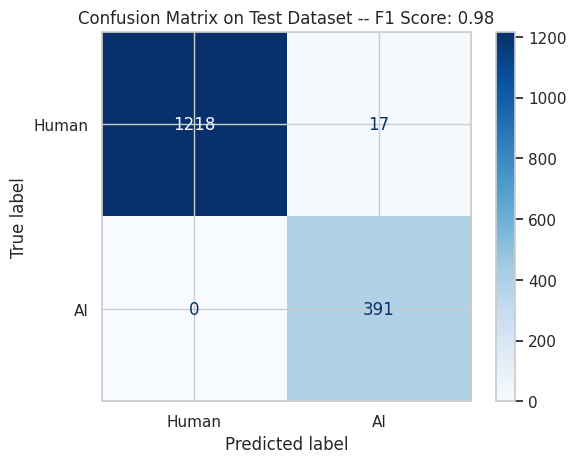

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
displayConfusionMatrix(y_test, y_pred_test,  "Test")

In [ ]:
train.query('label==0')['essay'].iloc[0]

'International sports events require the most well-trained athletes for each country, in order to achieve this goal countries make an effort to build infrastructure designed to train top athletes. Although this policy can indeed make fewer sports facilities for ordinary people, investing in the best athletes is vital to develop competitive sports performances in each country.\nOn the one hand, building specific infrastructure for the best athletes is crucial in order to get better results at international sports events such as The Olympics or the World Cup. The importance of getting better results is that it creates awareness of the importance of sports in society and motivates more people to do a sport. In this way, investing in these developments can help countries to develop an integral sport policy that can benefit everyone.\nOn the other hand, one can argue that a negative effect could be that less infrastructure is built for the rest of the people. However, people who practice a 

In [ ]:
devtest = pd.read_csv('/content/drive/MyDrive/Coling2025/english_devtest.csv')
devtest

,id,essay
0,abab7ec20320a84b1c1f097a39c895352e4341d6b00c3e...,"Enjoyment means entertainment, satisfaction of..."
1,15a035178efbb0f45d3d6e3421528e23721a802e6c4730...,Before to start with my opinion of the topic i...
2,ede4767f9bc94020ee2ed56ee0d03404c76c2877ce0218...,"Thats a really really good subject, but acctul..."
3,2c996b6d0beb561b9d0ea2b4426b3cf78cd88b544e0934...,I disagree with the statement saying that it i...
4,3cce0e704c3d2023155e3634f130c616bd49ff3b75eb8c...,It is undeniable that advertisements play a si...
...,...,...
864,a4faf8f47e79c51f71cafea21e8137fdeed7418a71229c...,Advertisements occupy a big part in our lives ...
865,318b7d74d32c4613b1ffc9b41b4a4b5fb321b815c27b05...,Young people are the fundamental building bloc...
866,6ca284a081ce0b739b68b3edca543780d88ee056425f3a...,"In my opinion, and experience, old people can ..."
867,980647f5bf2b94a4f67b6c36665b165440bbea259520d1...,I agree with this statement that most advertis...


In [ ]:
devtest_new = devtest["essay"]
devtest_new

,essay
0,"Enjoyment means entertainment, satisfaction of..."
1,Before to start with my opinion of the topic i...
2,"Thats a really really good subject, but acctul..."
3,I disagree with the statement saying that it i...
4,It is undeniable that advertisements play a si...
...,...
864,Advertisements occupy a big part in our lives ...
865,Young people are the fundamental building bloc...
866,"In my opinion, and experience, old people can ..."
867,I agree with this statement that most advertis...


In [ ]:
devtest_pred = classifier.predict(devtest_new)

28/28 ━━━━━━━━━━━━━━━━━━━━ 17s 630ms/step


In [ ]:
probabilities = tf.nn.softmax(devtest_pred).numpy()
probabilities

array([[9.8192006e-01, 1.8079953e-02],
       [9.9178255e-01, 8.2174856e-03],
       [9.9562824e-01, 4.3717157e-03],
       ...,
       [9.9652904e-01, 3.4710225e-03],
       [9.9401641e-01, 5.9835678e-03],
       [9.9710305e-04, 9.9900287e-01]], dtype=float32)

In [ ]:
predicted_classes = np.argmax(probabilities, axis=1)
predicted_classes

array([0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,

In [ ]:
devtest['predictions'] = predicted_classes
devtest

,id,essay,predictions
0,abab7ec20320a84b1c1f097a39c895352e4341d6b00c3e...,"Enjoyment means entertainment, satisfaction of...",0
1,15a035178efbb0f45d3d6e3421528e23721a802e6c4730...,Before to start with my opinion of the topic i...,0
2,ede4767f9bc94020ee2ed56ee0d03404c76c2877ce0218...,"Thats a really really good subject, but acctul...",0
3,2c996b6d0beb561b9d0ea2b4426b3cf78cd88b544e0934...,I disagree with the statement saying that it i...,0
4,3cce0e704c3d2023155e3634f130c616bd49ff3b75eb8c...,It is undeniable that advertisements play a si...,1
...,...,...,...
864,a4faf8f47e79c51f71cafea21e8137fdeed7418a71229c...,Advertisements occupy a big part in our lives ...,0
865,318b7d74d32c4613b1ffc9b41b4a4b5fb321b815c27b05...,Young people are the fundamental building bloc...,0
866,6ca284a081ce0b739b68b3edca543780d88ee056425f3a...,"In my opinion, and experience, old people can ...",0
867,980647f5bf2b94a4f67b6c36665b165440bbea259520d1...,I agree with this statement that most advertis...,0


In [ ]:
devtest_new = devtest[['id', 'predictions']]
devtest_new

,id,predictions
0,abab7ec20320a84b1c1f097a39c895352e4341d6b00c3e...,0
1,15a035178efbb0f45d3d6e3421528e23721a802e6c4730...,0
2,ede4767f9bc94020ee2ed56ee0d03404c76c2877ce0218...,0
3,2c996b6d0beb561b9d0ea2b4426b3cf78cd88b544e0934...,0
4,3cce0e704c3d2023155e3634f130c616bd49ff3b75eb8c...,1
...,...,...
864,a4faf8f47e79c51f71cafea21e8137fdeed7418a71229c...,0
865,318b7d74d32c4613b1ffc9b41b4a4b5fb321b815c27b05...,0
866,6ca284a081ce0b739b68b3edca543780d88ee056425f3a...,0
867,980647f5bf2b94a4f67b6c36665b165440bbea259520d1...,0


In [ ]:
devtest_new['predictions'] = devtest_new['predictions'].astype(float)
devtest_new

<ipython-input-45-a9f66ad0e92e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  devtest_new['predictions'] = devtest_new['predictions'].astype(float)


,id,predictions
0,abab7ec20320a84b1c1f097a39c895352e4341d6b00c3e...,0.0
1,15a035178efbb0f45d3d6e3421528e23721a802e6c4730...,0.0
2,ede4767f9bc94020ee2ed56ee0d03404c76c2877ce0218...,0.0
3,2c996b6d0beb561b9d0ea2b4426b3cf78cd88b544e0934...,0.0
4,3cce0e704c3d2023155e3634f130c616bd49ff3b75eb8c...,1.0
...,...,...
864,a4faf8f47e79c51f71cafea21e8137fdeed7418a71229c...,0.0
865,318b7d74d32c4613b1ffc9b41b4a4b5fb321b815c27b05...,0.0
866,6ca284a081ce0b739b68b3edca543780d88ee056425f3a...,0.0
867,980647f5bf2b94a4f67b6c36665b165440bbea259520d1...,0.0


In [ ]:
devtest_new['predictions'] = devtest_new['predictions'].apply(lambda s: 'human' if s == 0.0 else 'ai')
devtest_new

<ipython-input-46-cefed2b6ed5e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  devtest_new['predictions'] = devtest_new['predictions'].apply(lambda s: 'human' if s == 0.0 else 'ai')


,id,predictions
0,abab7ec20320a84b1c1f097a39c895352e4341d6b00c3e...,human
1,15a035178efbb0f45d3d6e3421528e23721a802e6c4730...,human
2,ede4767f9bc94020ee2ed56ee0d03404c76c2877ce0218...,human
3,2c996b6d0beb561b9d0ea2b4426b3cf78cd88b544e0934...,human
4,3cce0e704c3d2023155e3634f130c616bd49ff3b75eb8c...,ai
...,...,...
864,a4faf8f47e79c51f71cafea21e8137fdeed7418a71229c...,human
865,318b7d74d32c4613b1ffc9b41b4a4b5fb321b815c27b05...,human
866,6ca284a081ce0b739b68b3edca543780d88ee056425f3a...,human
867,980647f5bf2b94a4f67b6c36665b165440bbea259520d1...,human


In [ ]:
devtest_new.rename(columns={'predictions': 'label'}, inplace=True)
devtest_new

<ipython-input-47-809acb62c9a0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  devtest_new.rename(columns={'predictions': 'label'}, inplace=True)


,id,label
0,abab7ec20320a84b1c1f097a39c895352e4341d6b00c3e...,human
1,15a035178efbb0f45d3d6e3421528e23721a802e6c4730...,human
2,ede4767f9bc94020ee2ed56ee0d03404c76c2877ce0218...,human
3,2c996b6d0beb561b9d0ea2b4426b3cf78cd88b544e0934...,human
4,3cce0e704c3d2023155e3634f130c616bd49ff3b75eb8c...,ai
...,...,...
864,a4faf8f47e79c51f71cafea21e8137fdeed7418a71229c...,human
865,318b7d74d32c4613b1ffc9b41b4a4b5fb321b815c27b05...,human
866,6ca284a081ce0b739b68b3edca543780d88ee056425f3a...,human
867,980647f5bf2b94a4f67b6c36665b165440bbea259520d1...,human


In [ ]:
devtest_new.to_csv('devtest_new.tsv', sep='\t', index=False)